## Final Project Submission

Please fill out:
* Student name: Esra Guzel
* Student pace: full time
* Scheduled project review date/time: ...
* Instructor name: Abhineeth Kulkarni
* Blog post URL: ....


In this project, I dealt with 'kc_house_data.csv' data which contains house prices from King County an area in the US State of Washington, this data also covers Seattle. To understand the data let's have a look at the information columns:

- id: unique identified for a house
- date: house was sold
- price: is prediction target
- bedrooms: number of Bedrooms/House
- bathrooms:  number of bathrooms/bedrooms
- sqft_livingsquare: footage of the home
- sqft_lotsquare: footage of the lot
- floors: floors (levels) in house
- waterfront: house which has a view to a waterfront
- view: has been viewed
- condition: how good the condition is ( Overall )
- grade: overall grade given to the housing unit, based on King County grading system
- sqft_above: square footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: built year
- yr_renovated: year when house was renovated
- zipcode: zip
- lat: latitude coordinate
- long: longitude coordinate
- sqft_living15: the square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors


## Obtaining the Data

In [1]:
# Importing the necessary libraries to start with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

df=pd.read_csv('kc_house_data.csv')

In [2]:
# Checking the data's first five rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

## Scrubbing the Data

After obtaining our data, it is important to check the data type and missing values for each column. The 'date' and 'sqft_basement' columns are object which needs to be changed. Also, the top 5 frequent values are listed to have idea about the columns' values. This step is important to decide which column type will remain same and which will be changed to categorical data type. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
for col in df.columns:
    try:
        print(col, df[col].value_counts(normalize=True)[:5])
    except:
        print(col, df[col].value_counts(normalize=True))

    print('\n')

id 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64


date 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64


price 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64


bedrooms 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64


bathrooms 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
3.75    0.007177
4.00    0.006297
4.50    0.004630
4.25    0.003658
0.75    0.003287
4.75    0.001065
5.00    0.000972
Name: bathrooms, dt

In [6]:
# Checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The 'waterfront', 'view' and 'yr_renovated' columns have missing values. Since the 'waterfront', 'yr_renovated' and 'view' columns contain 0 more than 90%, the missing values is filled with 0. 

In [7]:
# Filling missing values with 0
missing = ['waterfront', 'yr_renovated', 'view']
for cols in df[missing]:
    df[cols].fillna(value=0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
# Dealing with the value ? in the 'sqft_basement' column
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
4820.0    0.000046
415.0     0.000046
2130.0    0.000046
2120.0    0.000046
2300.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [10]:
# Dropping rows with the value ?
df.drop(df.index[df['sqft_basement'] == '?'], inplace = True)

In [12]:
# Checking values again
df['sqft_basement'].value_counts(normalize=True)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
4820.0    0.000047
415.0     0.000047
2130.0    0.000047
2120.0    0.000047
2300.0    0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [13]:
# Changing the data type to 'float'
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)

In [14]:
# Changing the data type to 'datetime'
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')
df['date'].dtype

dtype('<M8[ns]')

In [15]:
# Checking the column
df['date'][:10]

0    2014-10-13
1    2014-12-09
2    2015-02-25
3    2014-12-09
4    2015-02-18
5    2014-05-12
7    2015-01-15
8    2015-04-15
9    2015-03-12
10   2015-04-03
Name: date, dtype: datetime64[ns]

When predicting house prices, months and seasons can be important. For this reason, I will add 'month' and 'season' columns to the dataframe. 

In [16]:
# Creating 'month' column 
df['month'] = df['date'].dt.month

In [17]:
# Creating 'season' column 
seasons = {
    12: 'winter',
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
}
df['season'] = df['month'].replace(seasons)
df[['month', 'season']][:10]

        

,month,season
0,10,fall
1,12,winter
2,2,winter
3,12,winter
4,2,winter
5,5,spring
7,1,winter
8,4,spring
9,3,spring
10,4,spring


In [179]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,7.658279,1789.069006,291.851724,1971.023223,68.256492,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,1.174253,828.409769,442.498337,29.321938,362.765827,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,3.000000,370.000000,0.000000,1900.000000,0.000000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.00000,871200.000000


In [18]:
# Cheking for duplicated rows
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))
duplicates.head(10)

173


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,season
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500,12,winter
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244,12,winter
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,3,spring
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138,12,winter
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929,3,spring
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242,1,winter
824,726049190,2015-02-18,431000.0,3,1.00,1810,7200,1.0,0.0,0.0,...,680.0,1954,0.0,98133,47.7493,-122.351,1810,8100,2,winter
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0.0,0.0,...,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479,5,spring
1085,9834200885,2015-04-20,550000.0,4,2.50,2080,4080,1.0,0.0,0.0,...,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080,4,spring
1128,8062900070,2015-02-13,369000.0,5,1.50,2550,6300,1.0,0.0,0.0,...,990.0,1959,0.0,98056,47.5014,-122.172,1380,6300,2,winter


The 173 rows seems to be duplicated however there is a strong possibility that a house may changed ownership a few times and sold for different prices. Since the data is still valuable, it is better to keep the data.   

### Dealing with the Categorical Data

It essential to figure out which column should be evaluated as categorical data when predicting house prices. For this reason, I wanted to visualize the columns with scatter plot. 

In [19]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month'],
      dtype='object')

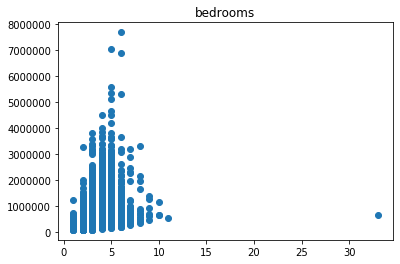

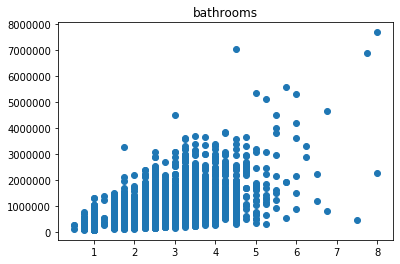

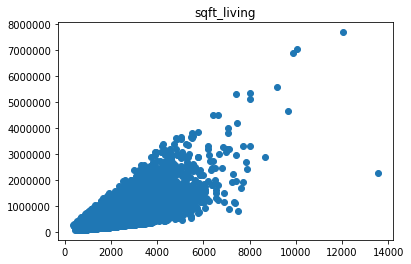

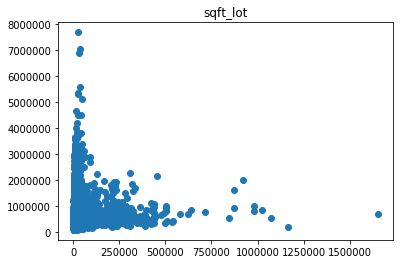

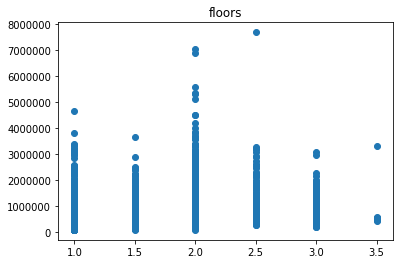

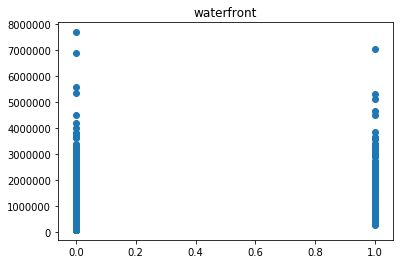

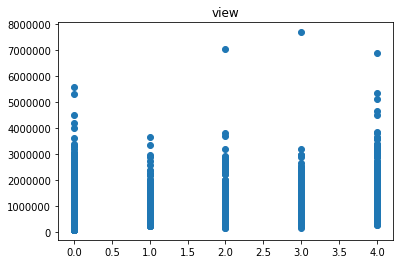

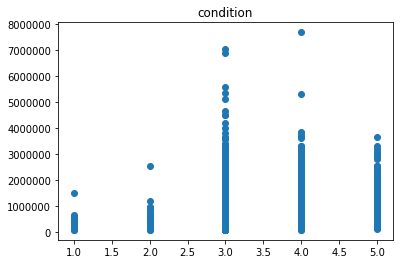

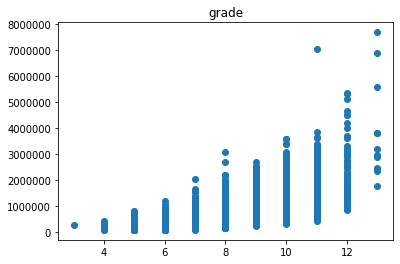

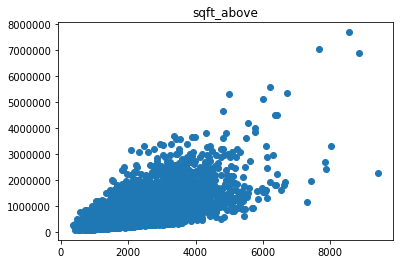

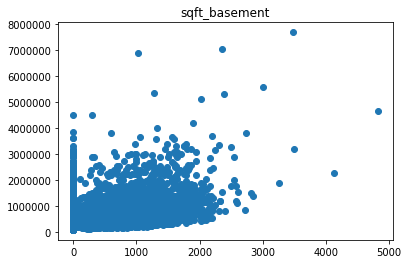

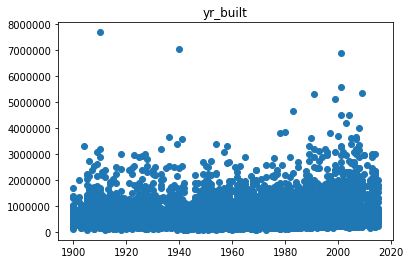

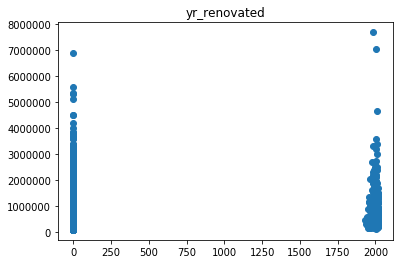

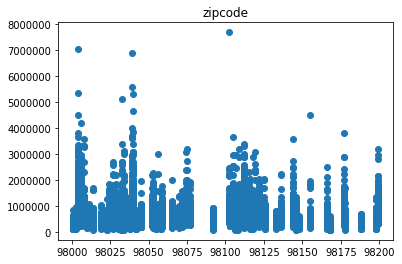

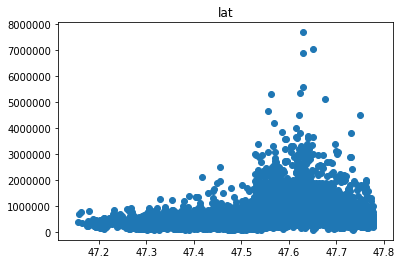

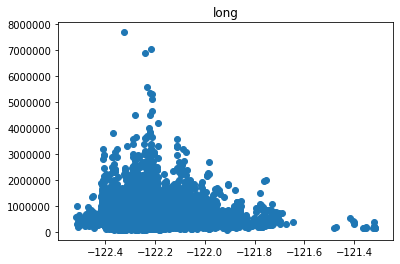

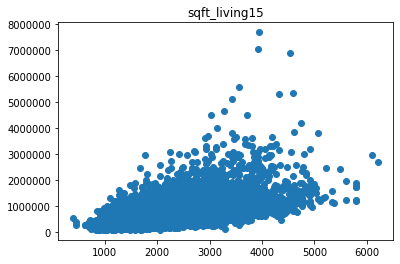

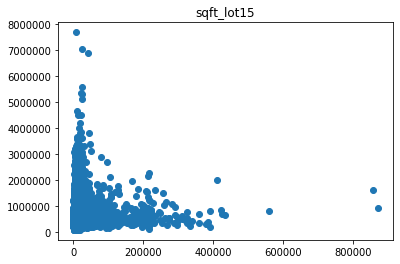

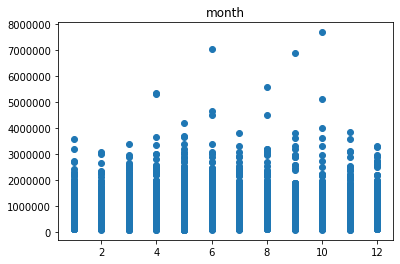

In [20]:

num_cols = df.select_dtypes('number').columns
num_cols
for col in num_cols[2:]:
    plt.scatter(df[col], df['price'])
    plt.title(col)
    plt.show()

Comments:
- 'bedrooms' column seems to have an outlier and except that the max bedroom number is 11. It may be evaluated as categorical value. 
- 'bathrooms' has balanced variety. It has a few outliers around 8. It is better to keep it as float. 
- It is obvious that 'sqft_living' has a linear relationship with price. It would be a good predictor after the outliers removed. 
- 'sqft_lot' can remain as integer. It may have a negative linearity with price.  
- It is clear that 'floors', 'waterfront', 'view' and 'condition' columns should be treated as categorical data. 
- 'grade' column shows great linearity. As a predictor it may have the highest coefficient. It can be treated as categorical. 
- 'sqft_above' and 'sqft_basement' columns show continuity and some linearity. 
- 'yr_built' shows continuity but not a clear positive linearity. It is observed that throughout the years the variance increased. 
- 'yr_renovated' and 'zipcode' columns should be treated as categorical data. 
- Tough 'lat' show some linearity both 'lat' and 'long' as well as 'zipcode' should be treated as categorical data. 

In [21]:
# Changing the column type and filling the values with one except the 0 values
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df[['yr_renovated','is_renovated']][:5]

,yr_renovated,is_renovated
0,0.0,0
1,1991.0,1
2,0.0,0
3,0.0,0
4,0.0,0


In [180]:
#  Changing the datatype for categorical data
df['waterfront'] = df['waterfront'].astype('category')
df['view'] =df['view'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')
df['season'] = df['season'].astype('category')
df['is_renovated'] = df['is_renovated'].astype('category')
df['floors']=df['floors'].astype('category')
df['condition']=df['condition'].astype('category')
df['lat']=df['lat'].astype('category')
df['long']=df['long'].astype('category')
df['month']=df['month'].astype('category')
df['bedrooms']=df['bedrooms'].astype('category')


In [96]:
import seaborn as sns

In [181]:
cat_col=['bedrooms', 'waterfront', 'view', 'season', 'is_renovated', 'floors', 'condition', 'month', 'grade']

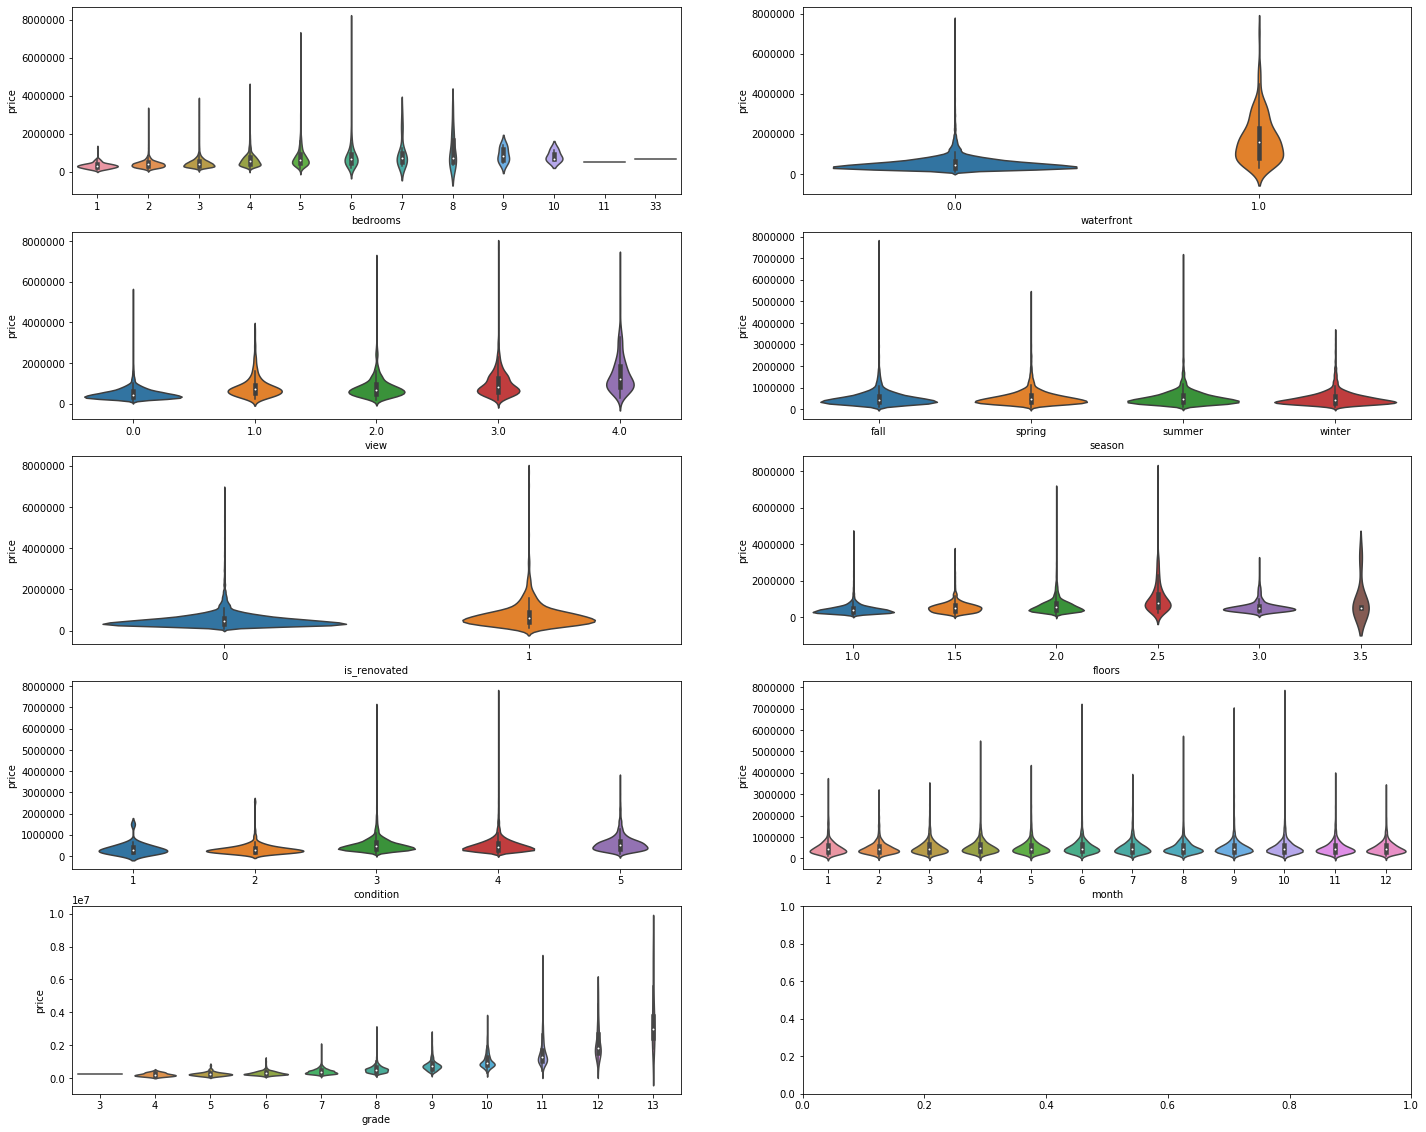

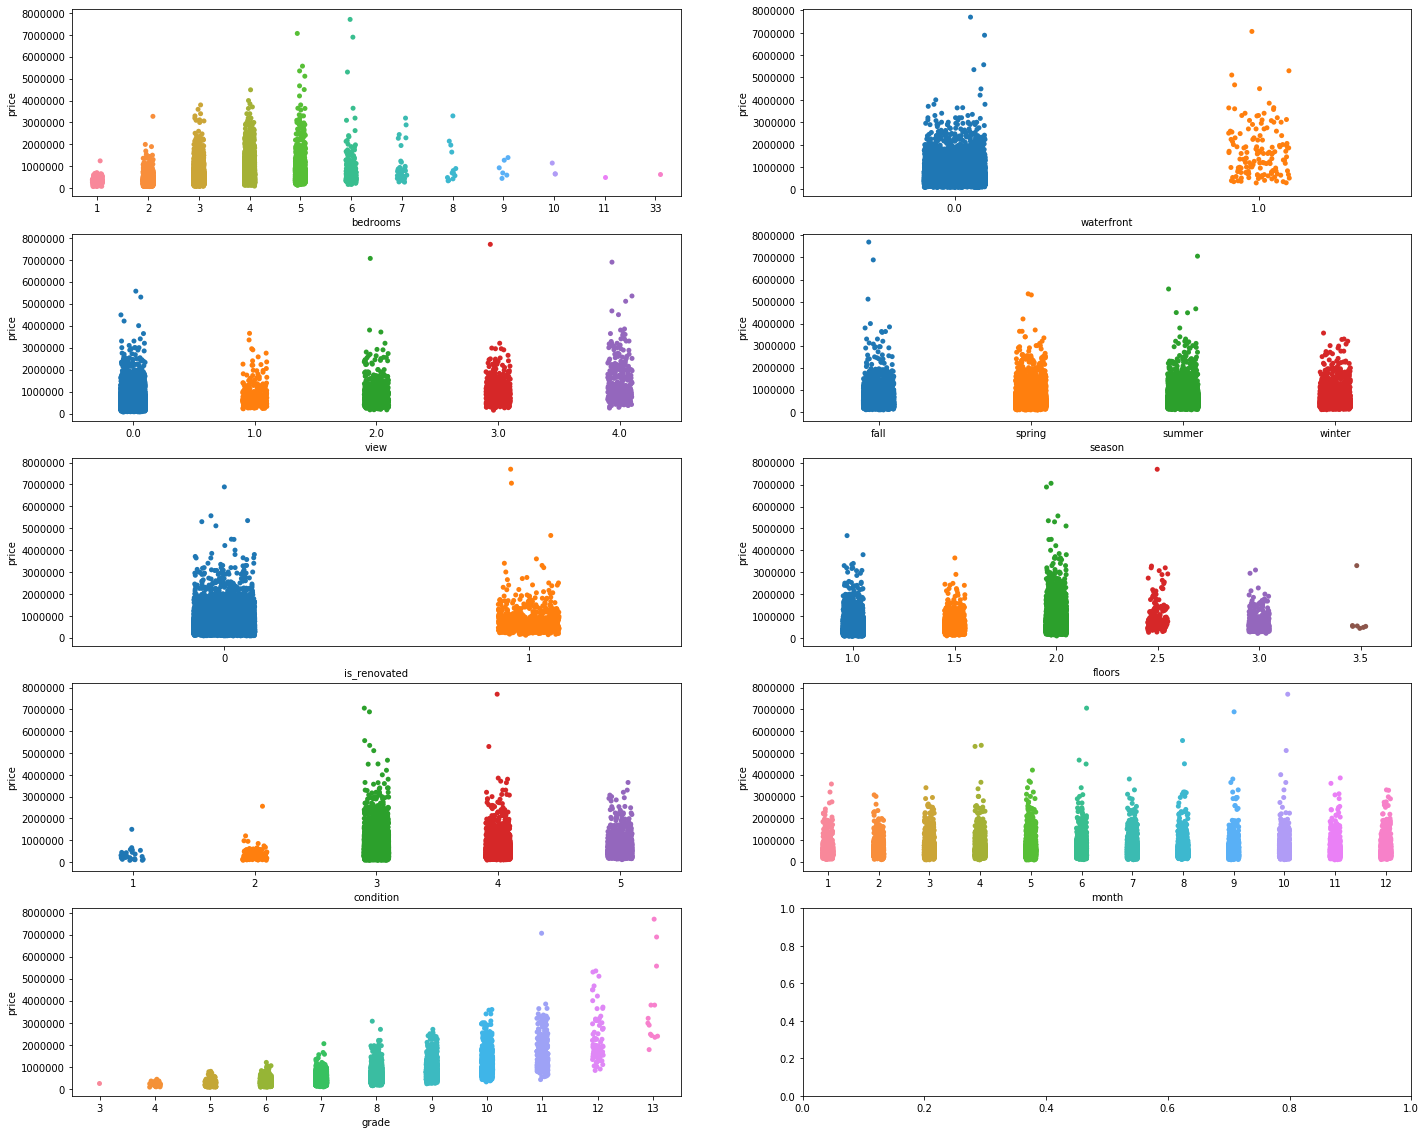

In [191]:
fig, ax1 = plt.subplots(5, 2, figsize=(24,20))
ax1 = ax1.flatten()
fig, ax2 = plt.subplots(5, 2, figsize=(24,20))
ax2 = ax2.flatten()
for c, col in enumerate(cat_col):
    
    sns.violinplot(x=col, y="price", data=df, ax=ax1[c]);
    sns.catplot(x=col, y="price", data=df, ax=ax2[c]);
    
    plt.close(3)
    plt.close(4)
    
plt.show()

Comments:

- Bedroom:
- Waterfront: The violin plot shows that houses with waterfront tend to have much higher median and better distribution compared to houses with no waterfront. After removing the outliers it may be a good predictor since the houses with waterfront tend to have higher prices.
- View: The median of the view slightly increases as the view number increases but houses with 0 view are much more demanded. Except view number 1, it has outliers in every view number. 
- Floor: Floor's median starts to decrease after the 2.5 floor. If we have a closer look  at the catplot 2.5 floor has an outlier which increases the median of the floor. Actually, the floor data becomes less predictive after 2 floor.   
- Condition: The condition's interaction with price is not as expected. The median of condition shows slight increase as the condition increases. The prices are higher at condition 3 and condition 4 and interestingly lower at condition 5. 
- Season: The median value for each season are almost the same. While fall, spring and summer has a bunch of outliers, winter season doesn't have any. It is not a good a good predictor contrary to expectations. 
- Month: Like season, month doesn't show any clear linear relation with price. The median values remain almost same for each month. Overall prices tend to increase during June, September and October because of outliers. 
- Is_renovated: Renovated houses are not demanded much compared to not renovated ones. For renovated houses price are seems to get higher due to a few outliers. 
- Grade: Among other categorical variables, grade look like the most promising one. The median and the house prices increase as the grade increases. It has a clear linear relation with price. Not only variance but also price distribution changes across different grade values. This indicates grade feature's huge potential as a strong predictor. 

In [73]:
# Creating dummy variable for categorical data
df_view_dummy = pd.get_dummies(df['view'], prefix='vw', drop_first=True)
df_condition_dummy = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)
df_floors_dummy = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
df_floors_dummy.drop(columns=['floor_3.5'], inplace=True)
df_season_dummy = pd.get_dummies(df['season'])
df_season_dummy.drop(columns = ['winter'], inplace=True)
df_season_dummy.head()

season,fall,spring,summer
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [38]:
# Cleaning the column names
df_view_dummy.rename(columns={
    'vw_1.0':'vw_1',
    'vw_2.0': 'vw_2',
    'vw_3.0': 'vw_3',
    'vw_4.0': 'vw_4'
}, inplace=True)
display(df_view_dummy.head())

df_floors_dummy.rename(columns={
    'floor_1.0': 'floor_1',
    'floor_1.5':'floor_1_5',
    'floor_2.0': 'floor_2',
    'floor_2.5': 'floor_2_5',
    'floor_3.0': 'floor_3'
}, inplace=True)
df_floors_dummy.head()

,vw_1,vw_2,vw_3,vw_4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


,floor_1_5,floor_2,floor_2_5,floor_3
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


The columns 'lat', 'long' and 'zipcode' are separated for further analysis to observe the effect of location on house prices.  

In [74]:
df_cat = pd.concat(
    [
        df_view_dummy,
        df_condition_dummy,
        df_floors_dummy,
        df_season_dummy,
        df['is_renovated'],
        df['waterfront']
    ], axis = 1)


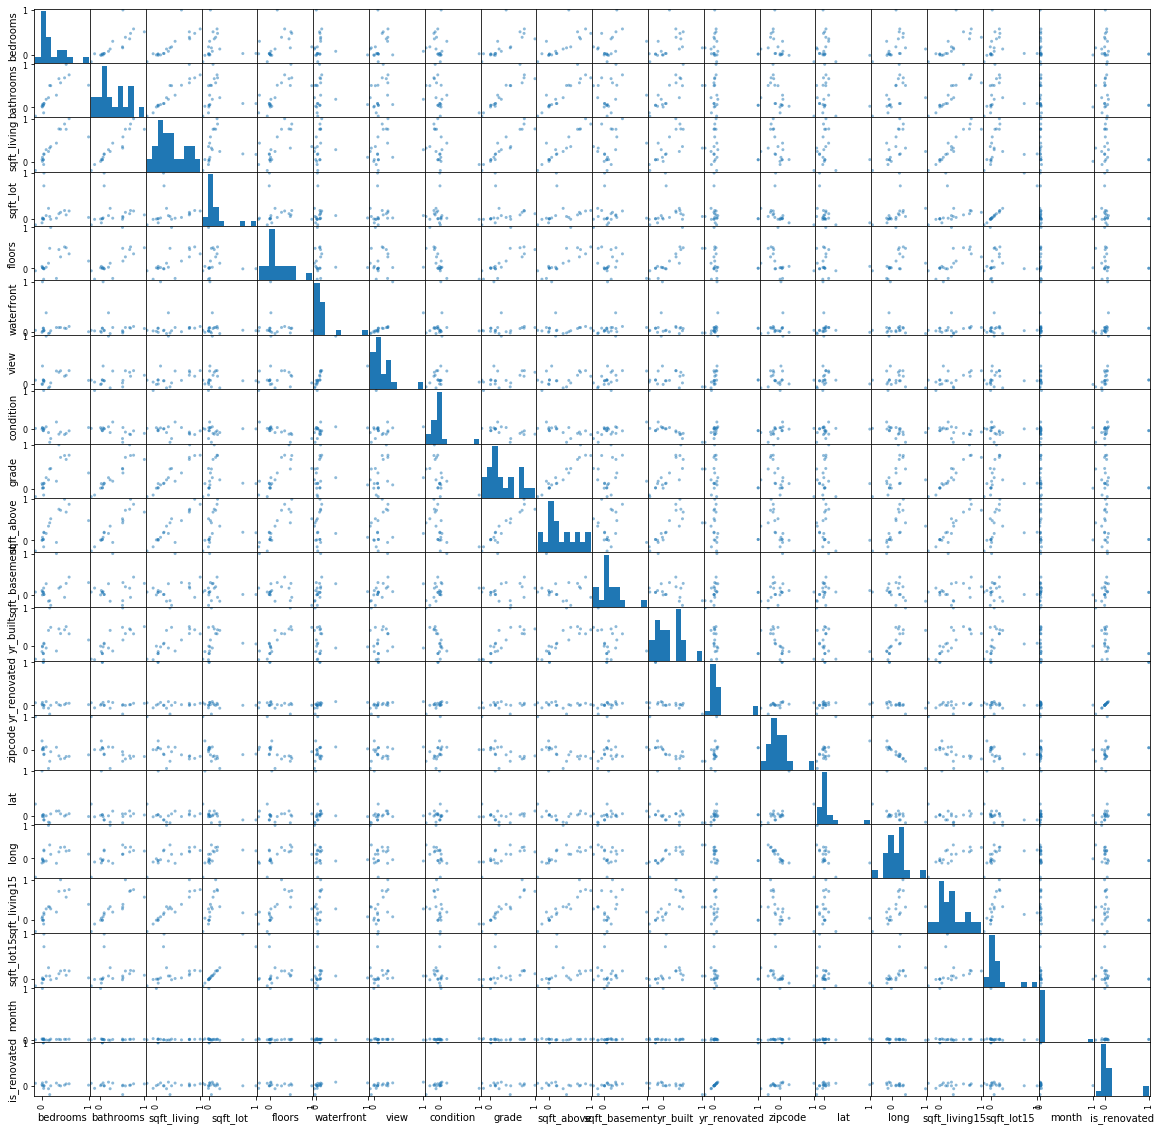

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
pd.plotting.scatter_matrix(df_corr,figsize  = [20, 20]);
plt.show()

In [23]:
df_corr = df.iloc[:,3:24].corr()
df_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,is_renovated
bedrooms,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.080208,0.025710,0.356882,0.479210,0.302683,0.157017,0.018452,-0.152628,-0.009521,0.131093,0.392476,0.030479,-0.001520,0.018189
bathrooms,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.186795,-0.128015,0.666493,0.686456,0.282693,0.508408,0.047955,-0.204306,0.024994,0.224479,0.570129,0.088834,0.008058,0.047521
sqft_living,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.282950,-0.061294,0.763101,0.876678,0.434576,0.319461,0.049964,-0.198906,0.052986,0.240797,0.756389,0.184466,0.011564,0.049733
sqft_lot,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.072420,-0.009671,0.113402,0.183461,0.015533,0.052768,0.004182,-0.129355,-0.085457,0.230583,0.143428,0.720649,-0.001711,0.004280
floors,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.027727,-0.264280,0.459214,0.524225,-0.245144,0.489665,0.003526,-0.058976,0.048977,0.125922,0.280294,-0.011545,0.013905,0.003443
waterfront,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.378926,0.016728,0.083602,0.072201,0.084949,-0.023843,0.070231,0.028152,-0.011567,-0.036371,0.085174,0.030250,0.009182,0.070561
view,0.080208,0.186795,0.282950,0.072420,0.027727,0.378926,1.000000,0.045355,0.249354,0.166610,0.275440,-0.054330,0.088347,0.085097,0.006375,-0.076119,0.280282,0.072555,-0.003671,0.088493
condition,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.045355,1.000000,-0.148508,-0.159289,0.170972,-0.362107,-0.056205,0.003437,-0.015592,-0.106285,-0.093493,-0.004860,0.021903,-0.055763
grade,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.249354,-0.148508,1.000000,0.756382,0.168023,0.448120,0.015882,-0.185131,0.113380,0.199187,0.713574,0.121921,0.008571,0.015529
sqft_above,0.479210,0.686456,0.876678,0.183461,0.524225,0.072201,0.166610,-0.159289,0.756382,1.000000,-0.052293,0.425180,0.019535,-0.260814,-0.000346,0.344543,0.731016,0.195638,0.009055,0.019454


In [26]:
abs(df_corr) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,is_renovated
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False


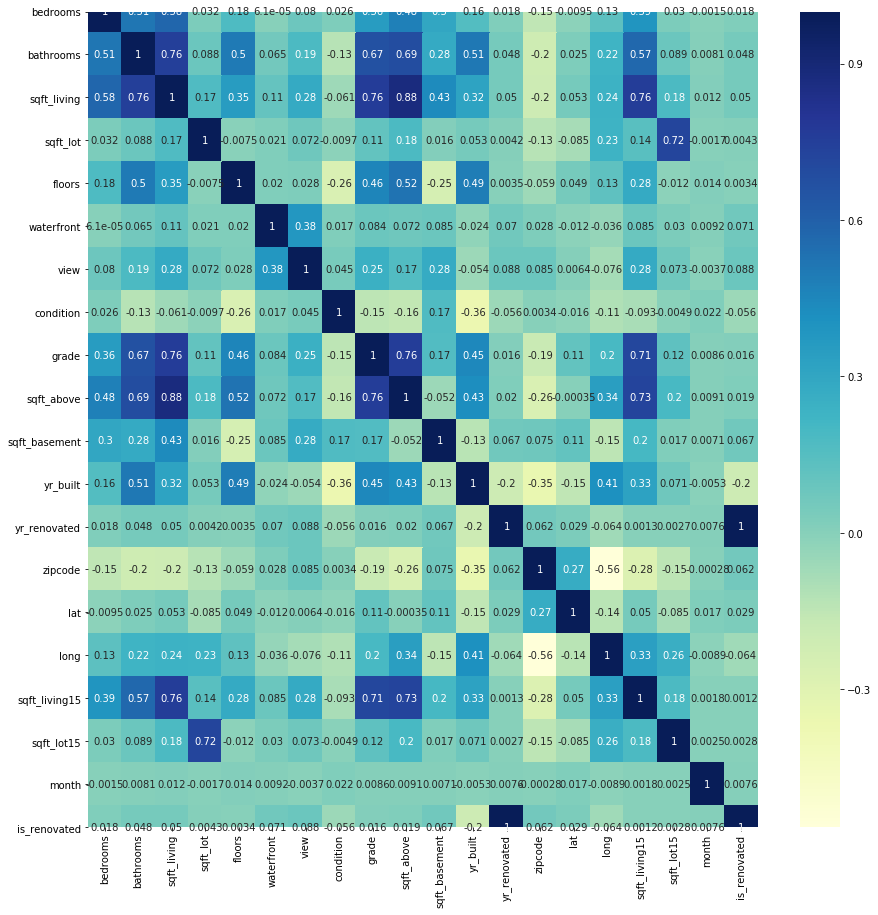

In [27]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df_corr, cmap="YlGnBu", annot=True);

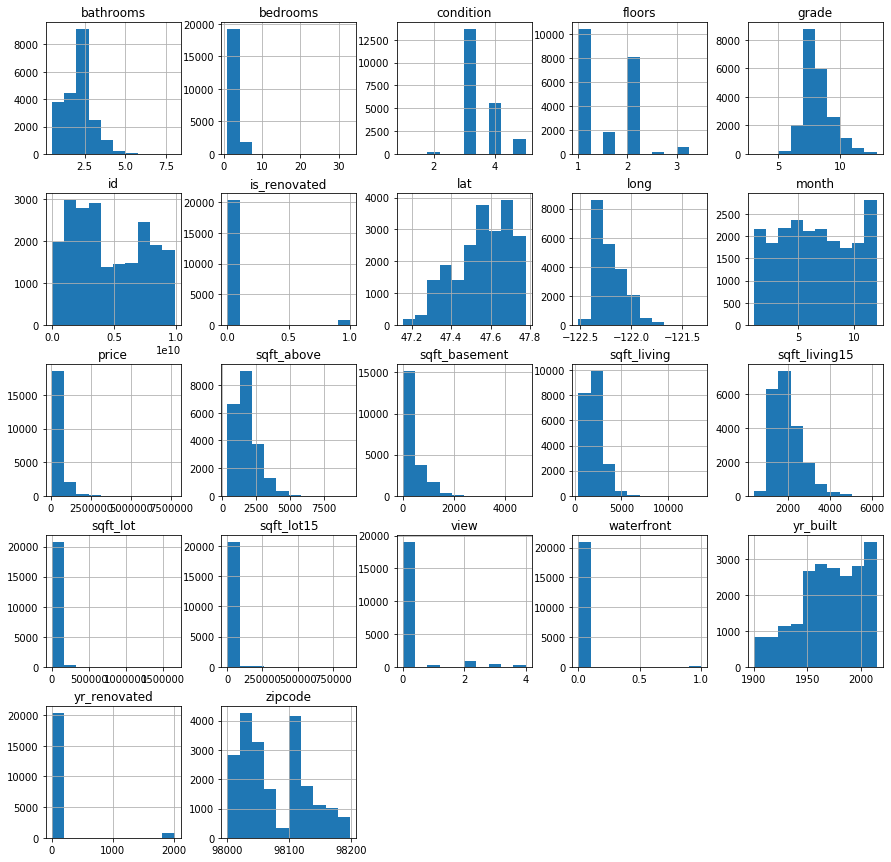

In [28]:
df.hist(figsize=(15,15));

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'season',
       'is_renovated'],
      dtype='object')

In [30]:
df_ = df[['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','grade','sqft_above', 'sqft_basement', 
        'yr_built','sqft_living15', 'sqft_lot15']].astype(float).copy(deep=True)

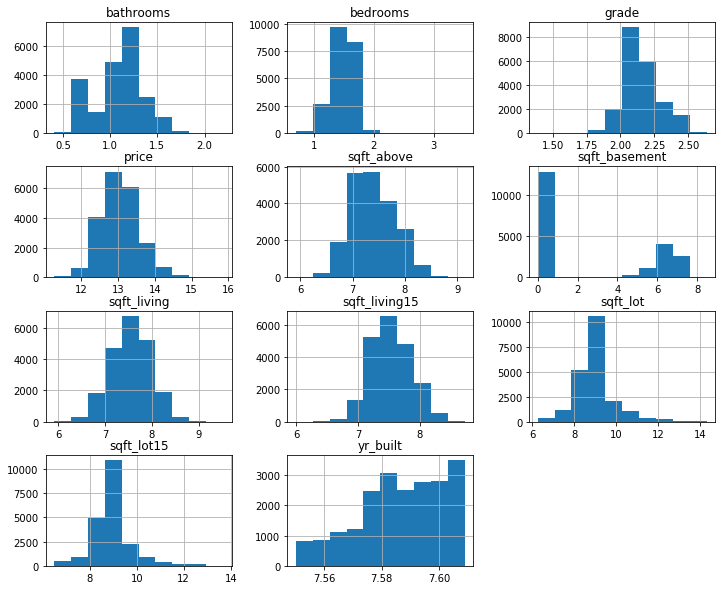

In [31]:
import numpy as np
df_log = (np.log1p(df_)).replace(-np.inf, 0)
df_log.hist(figsize=(12,10))
plt.show()

In [32]:
df_log.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [33]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# cols = ['price', 'sqft_lot', 'floors', 'condition',
#        'grade', 'sqft_above', 'sqft_basement', 
#         'sqft_living15', 'sqft_lot15']
# df_log[cols] = scaler.fit_transform(df_log[cols])

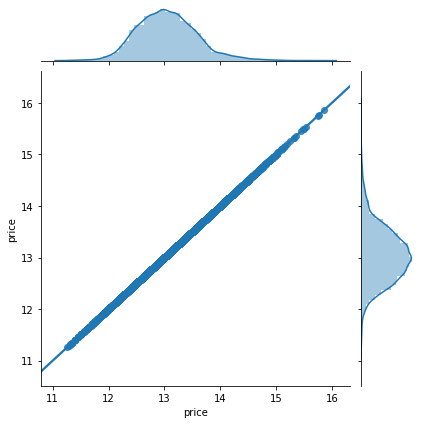

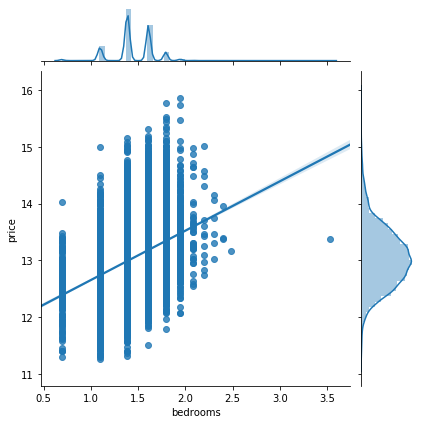

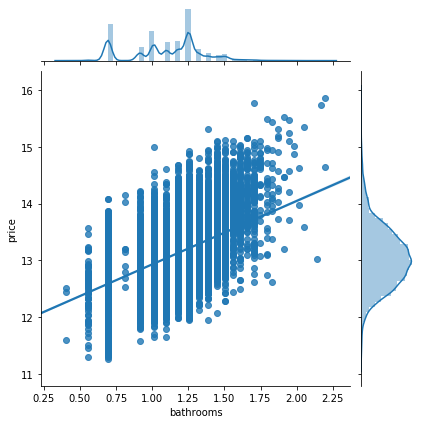

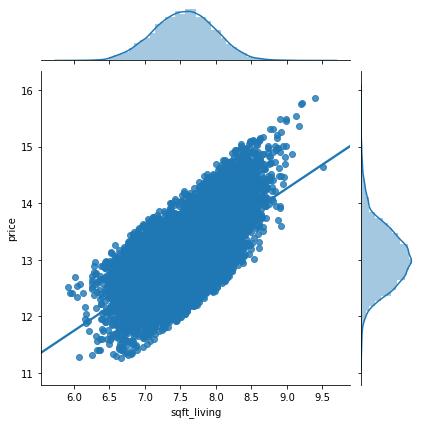

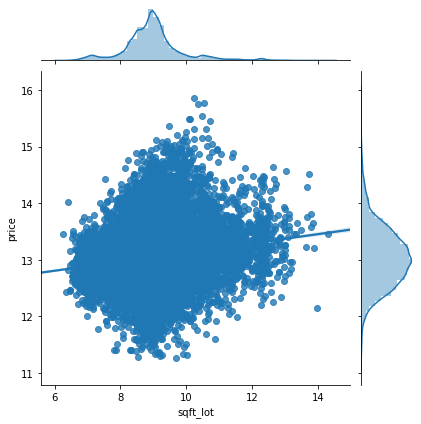

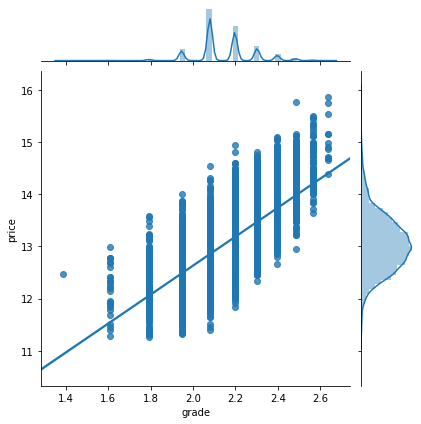

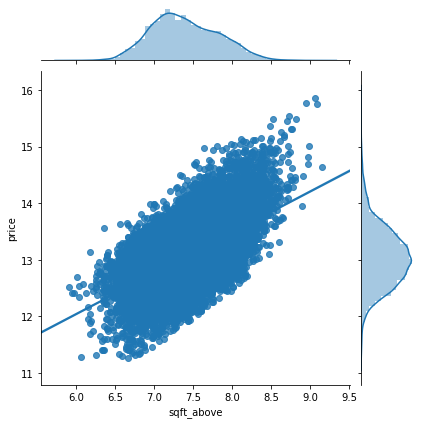

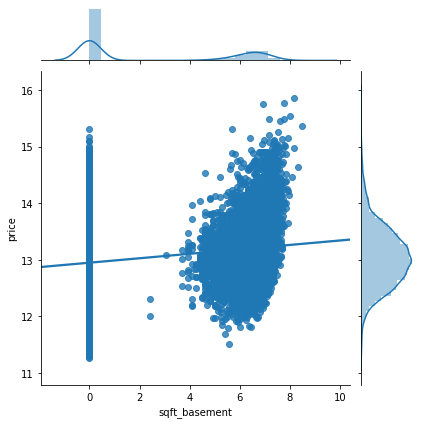

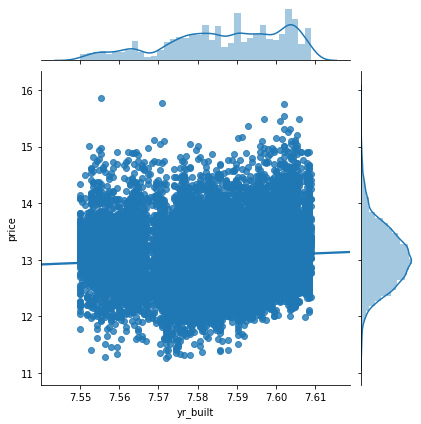

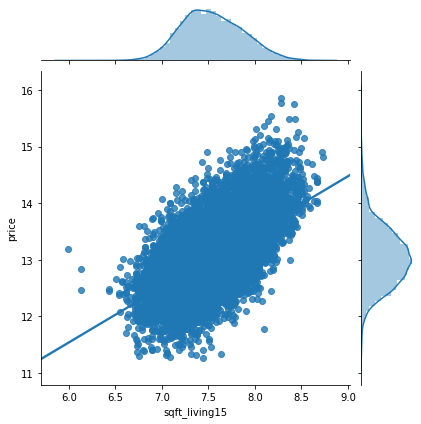

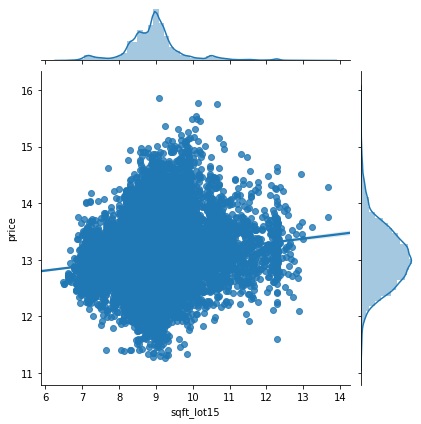

In [34]:
for col in df_log.columns:
    sns.jointplot(col, 'price', data=df_log, kind='reg');

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# Checking for Homoscedasticity
# plt.scatter('price', df)
# plt.plot()

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

In [39]:
df_final = pd.concat(
    [
        df_log, 
#         df_zipdummy, 
        df_view_dummy,  
        df_condition_dummy, 
        df_floors_dummy,
        df_season_dummy,
        df['waterfront']
    ], axis=1)

In [40]:
list(df_final.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'floor_3',
 'spring',
 'summer',
 'winter',
 'waterfront']

In [41]:
from statsmodels.tools.tools import add_constant

outcome = 'price'
predictors = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'sqft_living15',
    'sqft_lot15',
    'vw_1',
    'vw_2',
    'vw_3',
    'vw_4',
    'condition_2',
    'condition_3',
    'condition_4',
    'condition_5',
    'floor_1_5',
    'floor_2',
    'floor_2_5',
    'floor_3',
    'spring',
    'summer',
    'winter',
    'waterfront'
]

df_final = add_constant(df_final)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum
model = ols(formula=formula, data=df_final).fit()
model.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1609.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:26:08   Log-Likelihood:                -4896.3
No. Observations:               21143   AIC:                             9847.
Df Residuals:                   21116   BIC:                         1.006e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        90.4880      1.586     57.068      0.000      87.380      93.596
bedrooms         -0.1940      0.014    -14.138      0.000      -0.221      -0.167
bathrooms         0.1829      0.016     11.715      0.000       0.152       0.213
sqft_living       0.1324      0.026      5.086      0.000       0.081       0.183
sqft_lot         -0.0056      0.006     -0.922      0.357      -0.018       0.006
grade             1.7835      0.028     63.947      0.000       1.729       1.838
sqft_above        0.2230      0.026      8.734      0.000       0.173       0.273
sqft_basement     0.0200      0.002     11.758      0.000       0.017       0.023
yr_built        -11.3049      0.210    -53.762      0.000     -11.717     -10.893
sqft_living15     0.2823      0.011     26.336      0.000       0.261       0.303
sqft_lot15       -0.0446      0.007     -6.695      0.000      -0.058      -0.032
vw_1              0.1398      0.017      8.113      0.000       0.106       0.174
vw_2              0.0738      0.011      6.999      0.000       0.053       0.094
vw_3              0.1176      0.014      8.223      0.000       0.090       0.146
vw_4              0.2474      0.022     11.483      0.000       0.205       0.290
condition_2      -0.0100      0.062     -0.160      0.873      -0.132       0.112
condition_3       0.1274      0.058      2.193      0.028       0.014       0.241
condition_4       0.1454      0.058      2.502      0.012       0.031       0.259
condition_5       0.2199      0.058      3.762      0.000       0.105       0.335
floor_1_5         0.0301      0.009      3.523      0.000       0.013       0.047
floor_2           0.0358      0.007      5.043      0.000       0.022       0.050
floor_2_5         0.0819      0.026      3.204      0.001       0.032       0.132
floor_3           0.2347      0.015     15.368      0.000       0.205       0.265
spring            0.0507      0.006      8.762      0.000       0.039       0.062
summer            0.0093      0.006      1.601      0.109      -0.002       0.021
winter           -0.0038      0.007     -0.565      0.572      -0.017       0.009
waterfront        0.3717      0.031     11.899      0.000       0.311       0.433
==============================================================================
Omnibus:                       79.976   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.747
Skew:                          -0.024   Prob(JB):                     4.01e-24
Kurtosis:                       3.346   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. T

In [42]:
from sklearn.model_selection import train_test_split

data = df_final
x = df_final.drop('price', axis=1)
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(x_test), len(y_train), len(y_test))

15857 5286 15857 5286


In [43]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

import numpy as np

print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Mean Squarred Error: 56559004869.94223
Test Mean Squarred Error: 45703871475.06256
Train Root Mean Squarred Error: 237821.3717686916
Test Root Mean Squarred Error: 213784.6380707991


In [45]:
# df_final2=df_final.drop(column=[''])

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
df_predictor = df_final.drop(columns=['price'], axis=1)
X = df_predictor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(df_predictor.columns, vif))

[('const', 570598.9215487031),
 ('bedrooms', 1.8845385456258807),
 ('bathrooms', 3.4751757075836323),
 ('sqft_living', 27.638301531739646),
 ('sqft_lot', 6.85876926941833),
 ('grade', 3.080661738573026),
 ('sqft_above', 26.951507156014795),
 ('sqft_basement', 6.607406853616742),
 ('yr_built', 2.2349574242322046),
 ('sqft_living15', 2.793566452650194),
 ('sqft_lot15', 6.613641718398314),
 ('vw_1', 1.0260630460082616),
 ('vw_2', 1.0604413702757334),
 ('vw_3', 1.0639171780975147),
 ('vw_4', 1.5264481429168875),
 ('condition_2', 6.903010720432807),
 ('condition_3', 174.41641153191793),
 ('condition_4', 148.43592615071398),
 ('condition_5', 56.303590734212314),
 ('floor_1_5', 1.3301086293310158),
 ('floor_2', 2.700389453714628),
 ('floor_2_5', 1.0860171302649508),
 ('floor_3', 1.4431026789331003),
 ('spring', 1.6045746726801957),
 ('summer', 1.5979734373721655),
 ('winter', 1.4389376878011586),
 ('waterfront', 1.4775617890202208)]

In [48]:
df_predictor = df_final.drop(columns=['price', 'condition_3', 'sqft_lot'], axis=1)
X = df_predictor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(df_predictor.columns, vif))

[('const', 569551.738578979),
 ('bedrooms', 1.8836176324361884),
 ('bathrooms', 3.474484540839278),
 ('sqft_living', 27.597695434168674),
 ('grade', 3.067163958918822),
 ('sqft_above', 26.874595183082707),
 ('sqft_basement', 6.604694395079437),
 ('yr_built', 2.2268026695982464),
 ('sqft_living15', 2.7830290914160303),
 ('sqft_lot15', 1.561694053707937),
 ('vw_1', 1.0258859895382337),
 ('vw_2', 1.0601486984053345),
 ('vw_3', 1.0637239455963818),
 ('vw_4', 1.5260418415073034),
 ('condition_2', 1.0250015985400784),
 ('condition_4', 1.2107347472346235),
 ('condition_5', 1.1796218338902327),
 ('floor_1_5', 1.3266941512105004),
 ('floor_2', 2.6475066460538694),
 ('floor_2_5', 1.083471075481647),
 ('floor_3', 1.4200448403853805),
 ('spring', 1.6041519828585713),
 ('summer', 1.5975386725064278),
 ('winter', 1.4387380499427282),
 ('waterfront', 1.4773745246558145)]

In [49]:
# refit model after removing uninfluential features
from statsmodels.tools.tools import add_constant

outcome = 'price'
predictors = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'grade',
    'sqft_basement',
    'yr_built',
    'sqft_living15',
    'sqft_lot15',
    'vw_1',
    'vw_2',
    'vw_3',
    'vw_4',
    'condition_2',
    'condition_4',
    'condition_5',
    'floor_1_5',
    'floor_2',
    'floor_2_5',
    'floor_3',
    'spring',
    'summer',
    'waterfront'
]

df_final = add_constant(df_final)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum
model = ols(formula=formula, data=df_final).fit()
model.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1808.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:26:09   Log-Likelihood:                -4937.1
No. Observations:               21143   AIC:                             9922.
Df Residuals:                   21119   BIC:                         1.011e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        90.4891      1.588     56.970      0.000      87.376      93.602
bedrooms         -0.1960      0.014    -14.262      0.000      -0.223      -0.169
bathrooms         0.1857      0.016     11.877      0.000       0.155       0.216
sqft_living       0.3323      0.013     26.553      0.000       0.308       0.357
sqft_lot         -0.0033      0.006     -0.545      0.585      -0.015       0.009
grade             1.8283      0.027     66.501      0.000       1.774       1.882
sqft_basement     0.0072      0.001      8.345      0.000       0.006       0.009
yr_built        -11.2838      0.210    -53.608      0.000     -11.696     -10.871
sqft_living15     0.2846      0.011     26.543      0.000       0.264       0.306
sqft_lot15       -0.0450      0.007     -6.759      0.000      -0.058      -0.032
vw_1              0.1428      0.017      8.274      0.000       0.109       0.177
vw_2              0.0754      0.011      7.139      0.000       0.055       0.096
vw_3              0.1182      0.014      8.249      0.000       0.090       0.146
vw_4              0.2475      0.022     11.469      0.000       0.205       0.290
condition_2      -0.1313      0.024     -5.438      0.000      -0.179      -0.084
condition_4       0.0171      0.005      3.252      0.001       0.007       0.027
condition_5       0.0880      0.008     10.397      0.000       0.071       0.105
floor_1_5         0.0444      0.008      5.294      0.000       0.028       0.061
floor_2           0.0517      0.007      7.527      0.000       0.038       0.065
floor_2_5         0.1125      0.025      4.436      0.000       0.063       0.162
floor_3           0.2467      0.015     16.192      0.000       0.217       0.277
spring            0.0521      0.005     10.300      0.000       0.042       0.062
summer            0.0111      0.005      2.171      0.030       0.001       0.021
waterfront        0.3711      0.031     11.859      0.000       0.310       0.432
==============================================================================
Omnibus:                       81.993   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.440
Skew:                          -0.019   Prob(JB):                     6.33e-25
Kurtosis:                       3.354   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

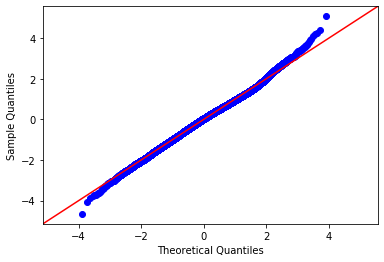

In [50]:
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [51]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df_predictor = df_final.drop('price', axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=80)
selector = selector.fit(df_predictor, df_final['price'])

selected_columns = df_predictor.columns.values[selector.support_]
selected_columns

array(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'vw_1', 'vw_2', 'vw_3', 'vw_4',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floor_1_5', 'floor_2', 'floor_2_5', 'floor_3', 'spring', 'summer',
       'winter', 'waterfront'], dtype=object)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

cv = KFold(n_splits=5, random_state=33, shuffle=True)
y_train_pred = cross_val_predict(linreg, x_train, y_train, cv=cv)

explained_variance = explained_variance_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f'Explained variance: {explained_variance}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R Squared: {r2}')

Explained variance: 0.5887936773500769
MSE: 57080299878.88666
RMSE: 238914.83813042392
R Squared: 0.5887936218973264


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

cv = KFold(n_splits=5, random_state=33, shuffle=True)
y_test_pred = cross_val_predict(linreg, x_test, y_test, cv=cv)

explained_variance = explained_variance_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Explained variance: {explained_variance}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R Squared: {r2}')

Explained variance: 0.6321591292002443
MSE: 46148070197.781395
RMSE: 214821.01898506438
R Squared: 0.6321590622770159


In [54]:
# df_predictor.drop(columns='sqft_living15', inplace=True)

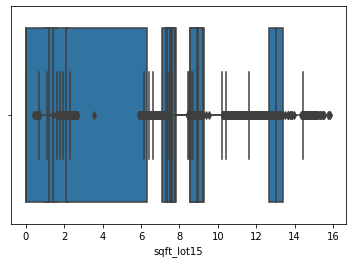

In [55]:
# removing outliers
import seaborn as sns
for column in list(df_log.columns):
    sns.boxplot(x=df_log[column]);